In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import plotly.offline as py
import plotly.express as px

In [2]:
df=pd.read_csv("C:\\Users\\hp\\Downloads\\ObesityDataSet_raw_and_data_sinthetic.csv")
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
df_prep = df.copy()

In [4]:
# create dummy variables
df_prep = pd.get_dummies(df_prep,columns=["Gender","family_history_with_overweight","FAVC","CAEC","SMOKE","SCC","CALC","MTRANS"])
df_prep.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,Gender_Female,...,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,Normal_Weight,1,...,0,0,0,0,1,0,0,0,1,0
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,Normal_Weight,1,...,1,0,0,1,0,0,0,0,1,0
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0,Normal_Weight,0,...,0,0,1,0,0,0,0,0,1,0
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0,Overweight_Level_I,0,...,0,0,1,0,0,0,0,0,0,1
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0,Overweight_Level_II,0,...,0,0,0,1,0,0,0,0,1,0


In [5]:
# split dataset in features and target variable
# Features
X = df_prep.drop(columns=["NObeyesdad"])
# Target variable
y = df_prep['NObeyesdad'] 

In [6]:
# import sklearn packages for data treatments
from sklearn.model_selection import train_test_split # Import train_test_split function
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.preprocessing import StandardScaler # Import for standard scaling of the data
from sklearn.preprocessing import MinMaxScaler # Import for standard scaling of the data
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# standard scale data
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)


# tested MinMaxScaler as KNN historically does better with MinMax
mm = MinMaxScaler()
X_train_mm_scaled = ss.fit_transform(X_train)
X_test_mm_scaled = ss.transform(X_test)


# program to run multilple models though sklearn 
# Default settings output accuracy and classification report
# compares accuracy for scaled and unscaled data
def run_models(X_train: pd.DataFrame , y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame):
    models = [('Random Forest', RandomForestClassifier(random_state=2020)),
              ('Decision Tree', DecisionTreeClassifier()),
              ('KNN', KNeighborsClassifier()),
              ('SVM', SVC()),
              ('AdaBoost',AdaBoostClassifier(n_estimators=10,learning_rate=1)),
              ('NaiveBayes',GaussianNB())]  
    
    for name, model in models:        
        # unscaled data
        clf = model.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        
        # scaled data
        clf_scaled = model.fit(X_train_scaled, y_train)
        y_pred_scaled = clf_scaled.predict(X_test_scaled)
        
        # mm scaled data
        clf_mm_scaled = model.fit(X_train_mm_scaled, y_train)
        y_pred_mm_scaled = clf_scaled.predict(X_test_mm_scaled)
        
        # accuracy scores
        accuracy = round(metrics.accuracy_score(y_test, y_pred),5)
        scaled_accuracy = round(metrics.accuracy_score(y_test, y_pred_scaled),5)
        scaled_mm_accuracy = round(metrics.accuracy_score(y_test, y_pred_mm_scaled),5)
        
        # output
        print(name + ':')        
        print("---------------------------------------------------------------")      
        print("Accuracy:", accuracy)
        print("Accuracy w/Scaled Data (ss):", scaled_accuracy)
        print("Accuracy w/Scaled Data (mm):", scaled_mm_accuracy)
        if (accuracy > scaled_accuracy) and (accuracy > scaled_mm_accuracy):
            print(name + ':')
            print("\nClassification Report:\n", metrics.classification_report(y_test, y_pred))      
            print("                            -----------------------------------               \n")
            print(name + ':')
            cm = confusion_matrix(y_test, y_pred)
            cm_df = pd.DataFrame(cm,index = ['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II','Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
           'Obesity_Type_III'],columns = ['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
           'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
            'Obesity_Type_III'])
            plt.figure(figsize=(5,4))
            sns.heatmap(cm_df, annot=True)
            plt.title('Confusion Matrix')
            plt.ylabel('Actal Values')
            plt.xlabel('Predicted Values')
            plt.show()
        elif (scaled_accuracy > scaled_mm_accuracy):
            print(name + ':')
            print("\nClassification Report (ss):\n", metrics.classification_report(y_test, y_pred_scaled))      
            print("                            -----------------------------------               \n")
            print(name + ':')
            cm = confusion_matrix(y_test, y_pred_scaled)
            cm_df = pd.DataFrame(cm,index = ['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
           'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
            'Obesity_Type_III'],columns = ['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
           'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
           'Obesity_Type_III'])
            plt.figure(figsize=(5,4))
            sns.heatmap(cm_df, annot=True)
            plt.title('Confusion Matrix')
            plt.ylabel('Actal Values')
            plt.xlabel('Predicted Values')
            plt.show()
        else:
            print(name + ':')
            print("\nClassification Report (mm):\n", metrics.classification_report(y_test, y_pred_mm_scaled))      
            print("                            -----------------------------------               \n")
            print(name + ':')
            cm = confusion_matrix(y_test, y_pred_mm_scaled)
            cm_df = pd.DataFrame(cm,index = ['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
           'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
           'Obesity_Type_III'],columns = ['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
            'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
           'Obesity_Type_III'])
            plt.figure(figsize=(5,4))
            sns.heatmap(cm_df, annot=True)
            plt.title('Confusion Matrix')
            plt.ylabel('Actal Values')
            plt.xlabel('Predicted Values')
            plt.show()

Random Forest:
---------------------------------------------------------------
Accuracy: 0.91798
Accuracy w/Scaled Data (ss): 0.91798
Accuracy w/Scaled Data (mm): 0.91798
Random Forest:

Classification Report (mm):
                      precision    recall  f1-score   support

Insufficient_Weight       0.96      0.95      0.95        92
      Normal_Weight       0.70      0.87      0.77        77
     Obesity_Type_I       1.00      0.90      0.95       114
    Obesity_Type_II       0.99      1.00      0.99        85
   Obesity_Type_III       1.00      1.00      1.00        92
 Overweight_Level_I       0.95      0.79      0.86        89
Overweight_Level_II       0.85      0.92      0.88        85

           accuracy                           0.92       634
          macro avg       0.92      0.92      0.92       634
       weighted avg       0.93      0.92      0.92       634

                            -----------------------------------               

Random Forest:


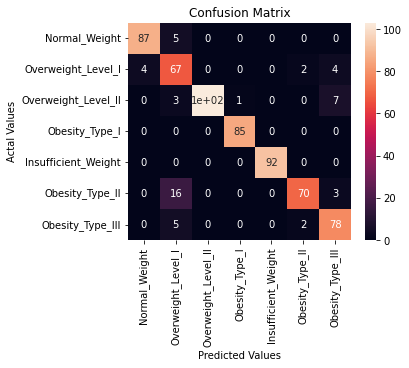

Decision Tree:
---------------------------------------------------------------
Accuracy: 0.93691
Accuracy w/Scaled Data (ss): 0.94322
Accuracy w/Scaled Data (mm): 0.93849
Decision Tree:

Classification Report (ss):
                      precision    recall  f1-score   support

Insufficient_Weight       0.95      0.98      0.96        92
      Normal_Weight       0.93      0.84      0.88        77
     Obesity_Type_I       0.92      0.95      0.93       114
    Obesity_Type_II       0.96      0.95      0.96        85
   Obesity_Type_III       1.00      1.00      1.00        92
 Overweight_Level_I       0.91      0.94      0.93        89
Overweight_Level_II       0.94      0.92      0.93        85

           accuracy                           0.94       634
          macro avg       0.94      0.94      0.94       634
       weighted avg       0.94      0.94      0.94       634

                            -----------------------------------               

Decision Tree:


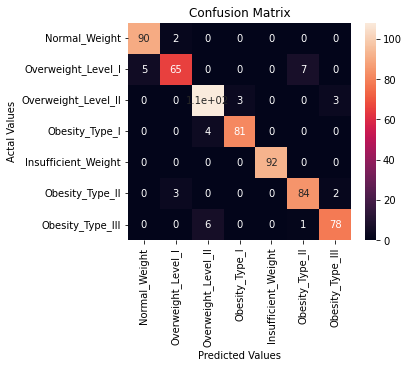

KNN:
---------------------------------------------------------------
Accuracy: 0.88801
Accuracy w/Scaled Data (ss): 0.79653
Accuracy w/Scaled Data (mm): 0.79653
KNN:

Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.84      0.99      0.91        92
      Normal_Weight       0.90      0.48      0.63        77
     Obesity_Type_I       0.91      0.93      0.92       114
    Obesity_Type_II       0.95      0.99      0.97        85
   Obesity_Type_III       1.00      0.99      0.99        92
 Overweight_Level_I       0.80      0.92      0.86        89
Overweight_Level_II       0.83      0.85      0.84        85

           accuracy                           0.89       634
          macro avg       0.89      0.88      0.87       634
       weighted avg       0.89      0.89      0.88       634

                            -----------------------------------               

KNN:


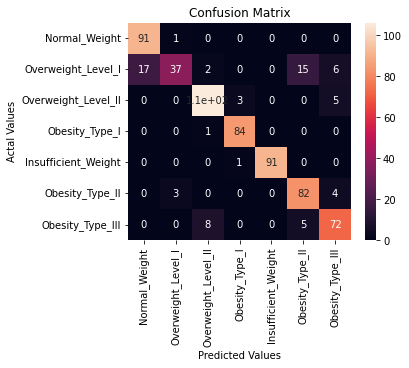

SVM:
---------------------------------------------------------------
Accuracy: 0.5694
Accuracy w/Scaled Data (ss): 0.80442
Accuracy w/Scaled Data (mm): 0.80442
SVM:

Classification Report (mm):
                      precision    recall  f1-score   support

Insufficient_Weight       0.86      0.91      0.88        92
      Normal_Weight       0.53      0.70      0.61        77
     Obesity_Type_I       0.85      0.72      0.78       114
    Obesity_Type_II       0.87      0.98      0.92        85
   Obesity_Type_III       0.99      0.98      0.98        92
 Overweight_Level_I       0.81      0.65      0.72        89
Overweight_Level_II       0.74      0.69      0.72        85

           accuracy                           0.80       634
          macro avg       0.81      0.80      0.80       634
       weighted avg       0.81      0.80      0.81       634

                            -----------------------------------               

SVM:


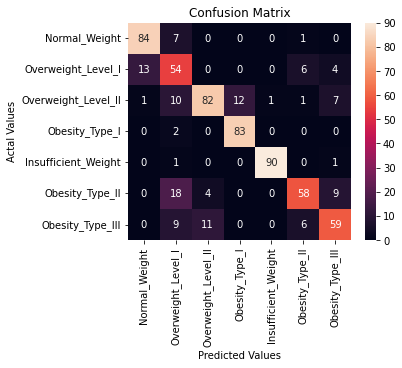

AdaBoost:
---------------------------------------------------------------
Accuracy: 0.29495
Accuracy w/Scaled Data (ss): 0.29495
Accuracy w/Scaled Data (mm): 0.29495
AdaBoost:

Classification Report (mm):
                      precision    recall  f1-score   support

Insufficient_Weight       1.00      0.03      0.06        92
      Normal_Weight       0.31      0.53      0.39        77
     Obesity_Type_I       0.22      0.42      0.29       114
    Obesity_Type_II       0.78      0.16      0.27        85
   Obesity_Type_III       0.00      0.00      0.00        92
 Overweight_Level_I       0.33      0.02      0.04        89
Overweight_Level_II       0.31      0.93      0.46        85

           accuracy                           0.29       634
          macro avg       0.42      0.30      0.22       634
       weighted avg       0.41      0.29      0.21       634

                            -----------------------------------               

AdaBoost:


C:\Users\hp\.conda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\hp\.conda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\hp\.conda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



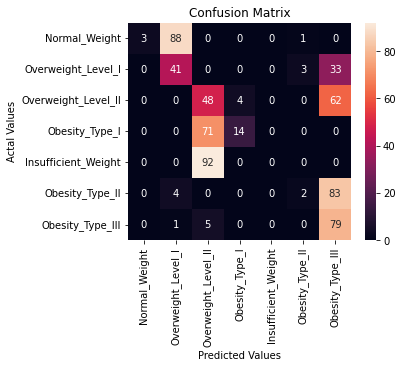

NaiveBayes:
---------------------------------------------------------------
Accuracy: 0.56782
Accuracy w/Scaled Data (ss): 0.58517
Accuracy w/Scaled Data (mm): 0.58517
NaiveBayes:

Classification Report (mm):
                      precision    recall  f1-score   support

Insufficient_Weight       0.57      0.97      0.72        92
      Normal_Weight       0.38      0.06      0.11        77
     Obesity_Type_I       0.46      0.29      0.35       114
    Obesity_Type_II       0.54      0.99      0.70        85
   Obesity_Type_III       0.99      0.98      0.98        92
 Overweight_Level_I       0.48      0.69      0.56        89
Overweight_Level_II       0.50      0.11      0.17        85

           accuracy                           0.59       634
          macro avg       0.56      0.58      0.51       634
       weighted avg       0.56      0.59      0.52       634

                            -----------------------------------               

NaiveBayes:


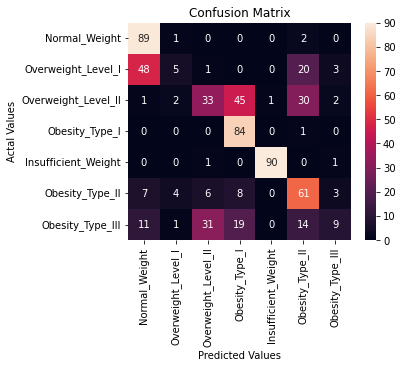

In [8]:
run_models(X_train, y_train, X_test, y_test)

from sklearn.decomposition import PCA
pca = PCA(n_components=8)
X_train= pca.fit_transform(X_train)
X_test= pca.fit_transform(X_test)

from sklearn import metrics
# standard scale data
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)


# tested MinMaxScaler as KNN historically does better with MinMax
mm = MinMaxScaler()
X_train_mm_scaled = ss.fit_transform(X_train)
X_test_mm_scaled = ss.transform(X_test)


# program to run multilple models though sklearn 
# Default settings output accuracy and classification report
# compares accuracy for scaled and unscaled data
def run_models(X_train: pd.DataFrame , y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame):
    models = [('Random Forest', RandomForestClassifier(random_state=2020)),
              ('Decision Tree', DecisionTreeClassifier()),
              ('KNN', KNeighborsClassifier()),
              ('SVM', SVC()),
              ('AdaBoost',AdaBoostClassifier(n_estimators=10,learning_rate=1)),
              ('NaiveBayes',GaussianNB())]  
    
    for name, model in models:        
        # unscaled data
        clf = model.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        
        # scaled data
        clf_scaled = model.fit(X_train_scaled, y_train)
        y_pred_scaled = clf_scaled.predict(X_test_scaled)
        
        # mm scaled data
        clf_mm_scaled = model.fit(X_train_mm_scaled, y_train)
        y_pred_mm_scaled = clf_scaled.predict(X_test_mm_scaled)
        
        # accuracy scores
        accuracy = round(metrics.accuracy_score(y_test, y_pred),5)
        scaled_accuracy = round(metrics.accuracy_score(y_test, y_pred_scaled),5)
        scaled_mm_accuracy = round(metrics.accuracy_score(y_test, y_pred_mm_scaled),5)
        
        # output
        from sklearn.metrics import confusion_matrix
        print(name + ':')        
        print("---------------------------------------------------------------") 
        print("Accuracy:", accuracy)
        print("Accuracy w/Scaled Data (ss):", scaled_accuracy)
        print("Accuracy w/Scaled Data (mm):", scaled_mm_accuracy)
        print(name + ':')
        cm = confusion_matrix(y_test, y_pred)
        cm_df = pd.DataFrame(cm,index = ['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'],columns = ['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'])
        plt.figure(figsize=(5,4))
        sns.heatmap(cm_df, annot=True)
        plt.title('Confusion Matrix')
        plt.ylabel('Actal Values')
        plt.xlabel('Predicted Values')
        plt.show()
        if (accuracy > scaled_accuracy) and (accuracy > scaled_mm_accuracy):
            print("\nClassification Report:\n", metrics.classification_report(y_test, y_pred))      
            print("                            -----------------------------------               \n")      
        elif (scaled_accuracy > scaled_mm_accuracy):
            print("\nClassification Report (ss):\n", metrics.classification_report(y_test, y_pred_scaled))      
            print("                            -----------------------------------               \n")     
        else:            
            print("\nClassification Report (mm):\n", metrics.classification_report(y_test, y_pred_mm_scaled))      
            print("                            -----------------------------------               \n")

run_models(X_train, y_train, X_test, y_test)